## Importing Libraries

In [47]:
import numpy as np
import tensorflow as tf

## Loading Model

In [34]:
model = tf.keras.models.load_model('trained_plant_disease_model.keras')

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                  

## Visualising Image

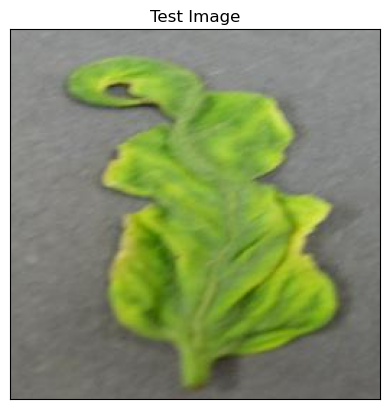

In [48]:
import matplotlib.pyplot as plt 
import cv2
image_path="test/TomatoYellowCurlVirus5.JPG"
img=cv2.imread(image_path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [49]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128,128))

In [50]:
input_arr=tf.keras.preprocessing.image.img_to_array(image)

In [51]:
input_arr=np.array([input_arr])
print(input_arr.shape)

(1, 128, 128, 3)


In [52]:
prediction=model.predict(input_arr)

1/1 [==============================] - 0s 160ms/step


In [53]:
prediction,prediction.shape

(array([[5.4028135e-07, 9.2410990e-15, 6.4428627e-05, 2.3097555e-05,
         2.4979272e-05, 2.3709925e-05, 4.2957524e-13, 1.6536721e-10,
         1.7998443e-17, 1.2878529e-08, 4.9628899e-13, 8.6543822e-10,
         1.6382598e-11, 2.3429202e-07, 1.5187995e-08, 1.1318354e-04,
         5.5606135e-05, 2.7896911e-09, 6.3429598e-06, 2.9195441e-08,
         3.2712655e-10, 1.2838298e-04, 6.9247182e-07, 5.3082999e-06,
         1.3825426e-06, 2.5149942e-03, 4.6151666e-07, 1.3406593e-06,
         2.6614347e-03, 1.9342881e-02, 1.2814292e-03, 1.6694479e-03,
         8.6649256e-05, 3.2072279e-03, 5.8534590e-04, 9.6807051e-01,
         3.6335387e-06, 1.2665865e-04]], dtype=float32),
 (1, 38))

In [54]:
result_index=np.argmax(prediction)

In [55]:
print(result_index)

35


In [56]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [57]:
model_prediction=class_name[result_index]

In [58]:
model_prediction

'Tomato___Tomato_Yellow_Leaf_Curl_Virus'

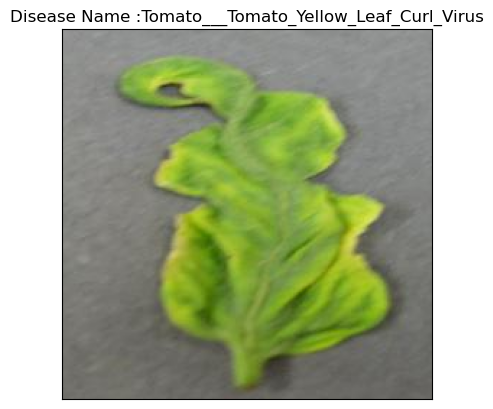

In [59]:
image_path="test/TomatoYellowCurlVirus5.JPG"
img=cv2.imread(image_path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(f"Disease Name :{model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()